# **CSE440: Natural Language Processing II (LAB)**
---
## **Lab Assignment 02: Word Representation**  

---


### **Student Details**


In [ ]:
ID = "22101698" # @param {"type":"string","placeholder":"Write your Student ID here"}
Name = "Jannatul Somiya Mahmud" # @param {"type":"string","placeholder":"Write your full name here"}

In [5]:
!pip install nltk -q

### **Task 01 ||**

In [6]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

def preprocess(reviews):
    patten = re.compile('<.*?>')
    reviews = patten.sub(r'',reviews)
    reviews = reviews.lower()
    tokens = word_tokenize(reviews)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return ' '.join(filtered_tokens)

df['cleaned_review'] = df['review'].apply(preprocess)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1 Score: 0.8888


### **Task 02 ||**

In [8]:
import kagglehub
path = kagglehub.dataset_download("thanakomsn/glove6b300dtxt")
glove_path = f"{path}/glove.6B.300d.txt"

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

embedding = {}

f = open(glove_path, 'r')

def validWord(word):
    return re.search(r'[a-zA-Z]', word)

for line in f:
    parts = line.strip().split()
    word = parts[0].lower()
    if validWord(word) and word.lower() not in stop_words:
        try:
            values = np.array(parts[1:], dtype=np.float32)
            embedding[word] = values
        except:
            continue
f.close()

def analogy(a, b, c, embeddings):
    words = [a.lower(), b.lower(), c.lower()]
    for i in words:
        if i not in embedding:
            return f"'{i}' not in vocabulary."

    a = embedding[words[0]]
    b = embedding[words[1]]
    c = embedding[words[2]]
    analogy_vector = a - b + c
    closest_words = []
    for word, vector in embedding.items():
        if word not in words:
            sim = cosine_similarity(analogy_vector.reshape(1, -1), vector.reshape(1, -1))[0][0]
            closest_words.append((word, sim))
    closest_words.sort(key=lambda x: x[1], reverse=True)
    return closest_words[:6]

result = analogy('queen', 'female', 'male', embedding)
print("\nqueen - female + male:")
for word, similarity in result:
    print(f"{word}: {similarity:.4f}")

100%|██████████| 386M/386M [00:08<00:00, 48.8MB/s]

Extracting files...



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



queen - female + male:
king: 0.6279
elizabeth: 0.6076
monarch: 0.5798
princess: 0.5623
royal: 0.5330
throne: 0.5251


### **Task 03 ||**

In [9]:
!pip install --upgrade numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Queen - Female + Male ≈ 
rifle: 0.9729
king: 0.9691
sister: 0.9685
o'banion: 0.9677
commander: 0.9671


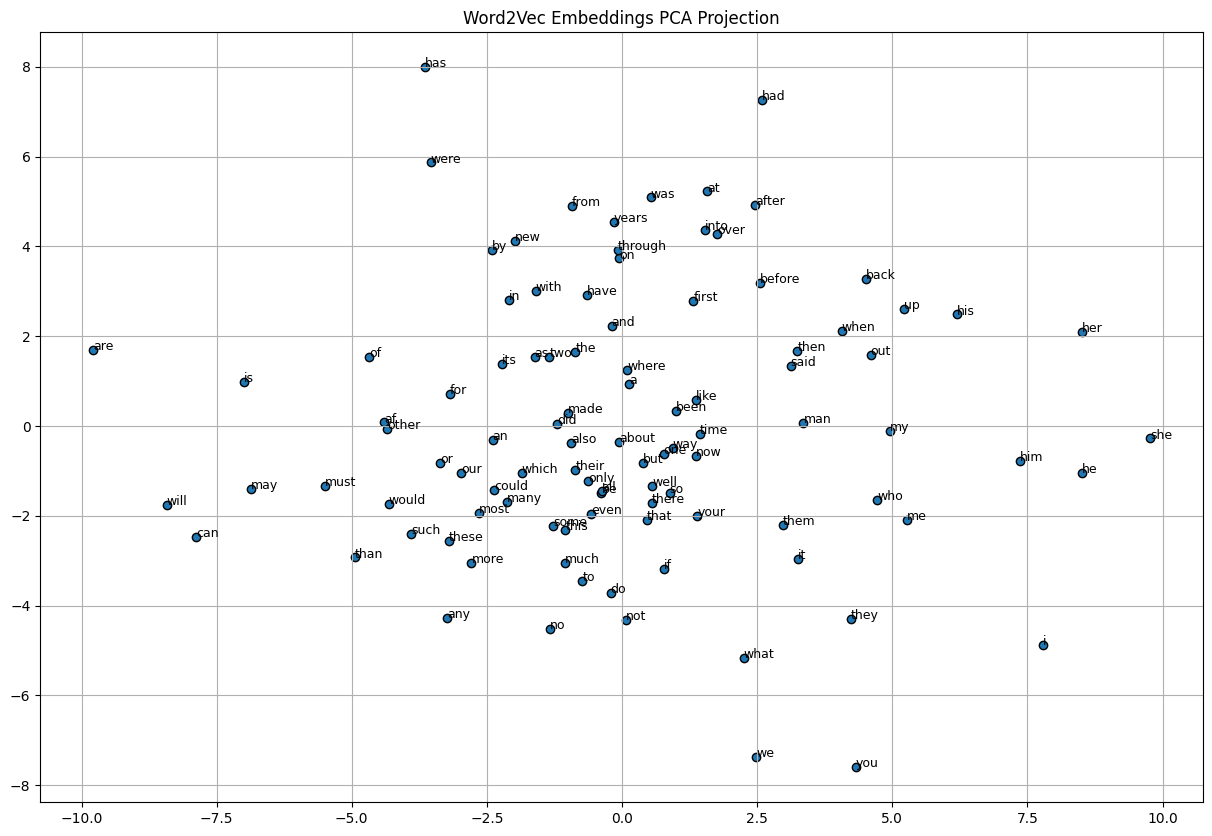

In [15]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
import nltk
import re
from gensim.models import Word2Vec
from nltk.probability import FreqDist
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


texts = brown.sents()

def is_valid_word(word):
    return re.search(r'[a-zA-Z]', word)

preprocessText = [[word.lower() for word in text if is_valid_word(word)] for text in texts]

w2v_model = Word2Vec(sentences = preprocessText, vector_size = 100, window = 5, min_count = 2, workers = 4)


def wordSimilarity(w1, w2, w2v_model):
    if w1 in w2v_model.wv and w2 in w2v_model.wv:
        return w2v_model.wv.similarity(w1, w2)
    return "One or both ws not in vocabulary"

def Analogy(w1, w2, w3, w2v_model):
    if w1 in w2v_model.wv and w2 in w2v_model.wv and w3 in w2v_model.wv:
        res = w2v_model.wv.most_similar(positive=[w1, w3], negative=[w2], topn=5)  #Queen – Female + Male”

        for word, score in res:
            print(f"{word}: {score:.4f}")
print("Queen - Female + Male ≈ ")
Analogy("queen", "female", "male", w2v_model)

words = [word for sentence in preprocessText for word in sentence]
fdist = FreqDist(words)
most_frequent_words= [word for word, freq in fdist.most_common(100)]

word_vectors = np.array([w2v_model.wv[word] for word in most_frequent_words])

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(15, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k')
for i, word in enumerate(most_frequent_words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)
plt.title("Word2Vec Embeddings PCA Projection")
plt.grid(True)
plt.show()